In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 

In [12]:
def plot_series(time,series,format='-',start=0,end=None):
  plt.plot(time[start:end],series[start:end],format)
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.grid(True)

In [13]:
def trend(time,slope=0):
  return (time*slope)

In [14]:
def seasonal_pattern(season_time):
  return np.where(season_time<0.1,np.cos(season_time*7*np.pi),1/np.exp(5*season_time))

In [15]:
def seasonality(time,period,amplitude=1,phase=0):
  season_time=((time+phase)%period)/period
  return amplitude*seasonal_pattern(season_time)

In [16]:
def noise(time,noise_level=1,seed=None):
  rnd=np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

In [17]:
time=np.arange(4*365+1,dtype='float32')
baseline=10
series=trend(time,0.1)
amplitude=40
slope=0.01
noise_level=2

In [18]:
series=baseline+trend(time,slope)+seasonality(time,period=365,amplitude=amplitude)

In [19]:
series=series+noise(time,noise_level,seed=42)

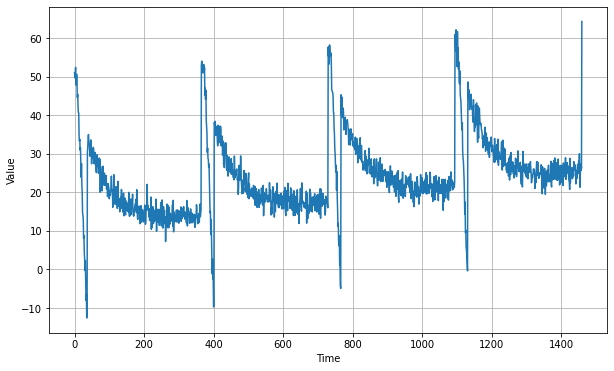

In [20]:
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [21]:
split_time=1100
time_train=time[:split_time]
x_train=series[:split_time]
time_valid=time[split_time:]
x_valid=series[split_time:]

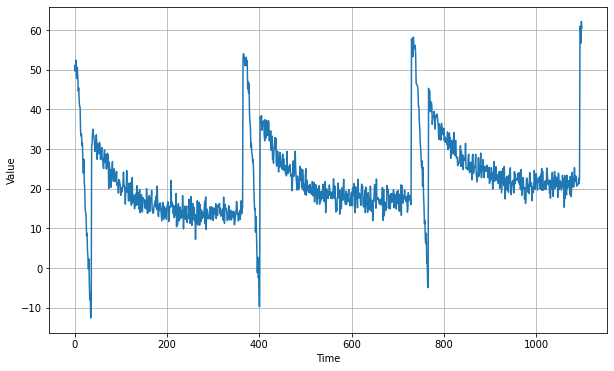

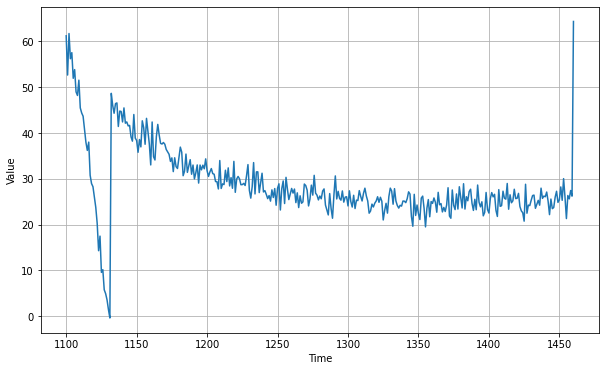

In [22]:
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

In [23]:
naive_forecast=series[split_time-1:-1]

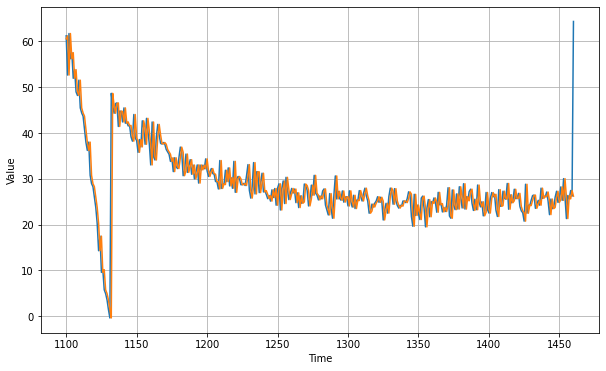

In [24]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

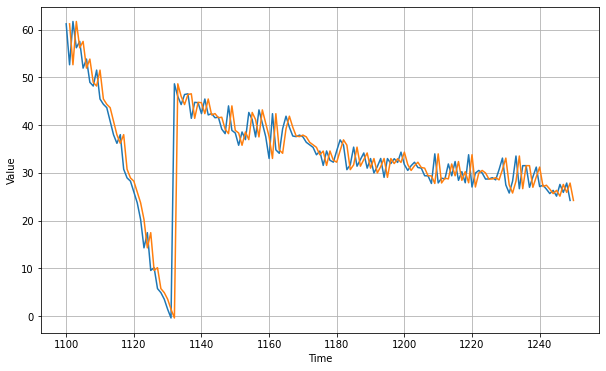

In [29]:
plt.figure(figsize=(10, 6))
plot_series(time_valid,x_valid,start=0,end=150)
plot_series(time_valid,naive_forecast,start=1,end=151)

In [32]:
print(keras.metrics.mean_absolute_error(x_valid,naive_forecast).numpy())
print(keras.metrics.mean_squared_error(x_valid,naive_forecast).numpy())

2.601197327615854
19.57830677706394


In [33]:
def moving_average_forecast(series,window_size):
  forecast=[]
  for time in range(len(series)-window_size):
    forecast.append(series[time:time+window_size].mean())
  return np.array(forecast)

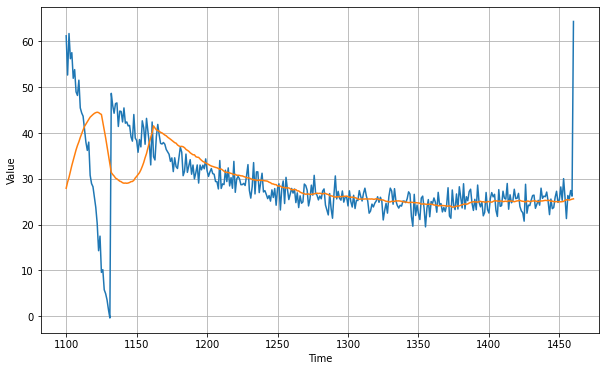

In [35]:
moving_avg = moving_average_forecast(series,window_size=30)[split_time-30:]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [36]:
print(keras.metrics.mean_absolute_error(x_valid,moving_avg).numpy())
print(keras.metrics.mean_squared_error(x_valid,moving_avg).numpy())

4.304002070391959
65.7862137508935


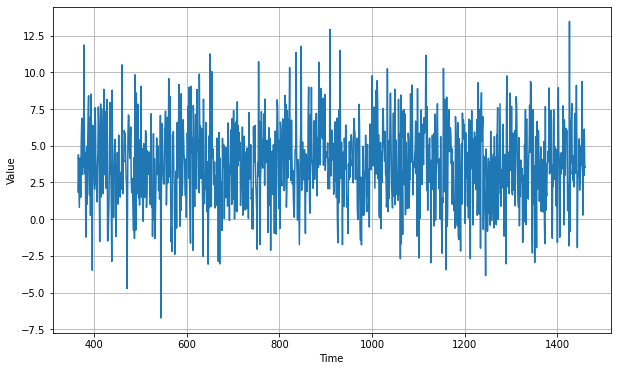

In [37]:
diff_series=(series[365:]-series[:-365])
diff_time=time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

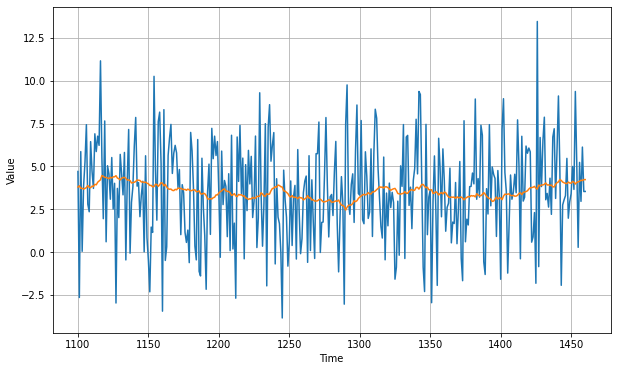

In [41]:
diff_moving_avg=moving_average_forecast(diff_series,window_size=50)[split_time-50-365:]
plt.figure(figsize=(10, 6))
plot_series(time_valid,diff_series[split_time-365:])
plot_series(time_valid,diff_moving_avg)
plt.show()

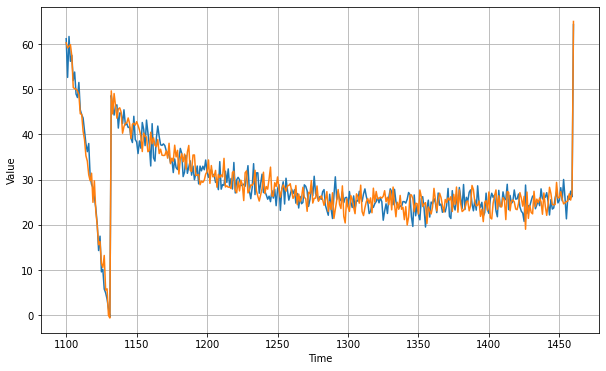

In [42]:
diff_moving_avg_plus_past=series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid,x_valid)
plot_series(time_valid,diff_moving_avg_plus_past)
plt.show()

In [43]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

8.498154736459373
2.3271792357731336


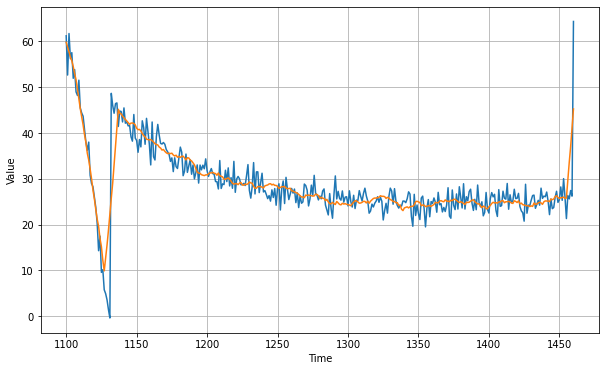

In [44]:
diff_moving_avg_plus_smooth_past=moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg
plt.figure(figsize=(10, 6))
plot_series(time_valid,x_valid)
plot_series(time_valid,diff_moving_avg_plus_smooth_past)
plt.show()

In [45]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

12.527959070889784
2.203443565649126
